Import File from Local

In [6]:
from google.colab import files
import pandas as pd
import io
uploaded = files.upload()
df = pd.read_csv('1-2020.csv')
print(df)

Saving 1-2020.csv to 1-2020.csv
     Unnamed: 0                                               text  label  \
0         27128  State broadcaster China Central Television ann...      0   
1         51116  The city of Lone Tree asked residents to avoid...      1   
2         19487  According to a manager at a store in the Penns...      0   
3         12607  About 6:50 p.m. , about five to six males wear...      1   
4         75678  Netflix has treated fans to a sneaky look at t...      1   
..          ...                                                ...    ...   
764       46794  • 106 people have died from a coronavirus outb...      1   
765       46795  • China is using drones to scold people for wa...      1   
766       46796  • The Dow erases January gains in the last day...      1   
767         745  It ’ s not unusual to see Asian tourists weari...      1   
768       84152  Russia has registered its first two cases of c...      1   

    timestamp  
0      1-2020  
1      1-20

In [4]:
%pip install sdv
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.1/156.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.6/187.6 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8

Synthetic Data Generated

In [7]:
metadata = SingleTableMetadata()
metadata.visualize()
metadata.detect_from_dataframe(df)

# Initialize and fit the synthesizer
synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(df)

# Generate synthetic data
synthetic_data = synthesizer.sample(100)
print(synthetic_data)

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


    Unnamed: 0           text  label timestamp
0     15979487  sdv-pii-pvwuz      1    1-2020
1      9402394  sdv-pii-ozvos      1    1-2020
2     15890308  sdv-pii-10umw      1    1-2020
3        52745  sdv-pii-t10n8      0    1-2020
4     15646528  sdv-pii-1miza      0    1-2020
..         ...            ...    ...       ...
95    16266190  sdv-pii-hrkrl      1    1-2020
96     3636114  sdv-pii-stmsx      0    1-2020
97     9799786  sdv-pii-15not      1    1-2020
98    16341865  sdv-pii-qz025      1    1-2020
99    13295628  sdv-pii-xwsoh      0    1-2020

[100 rows x 4 columns]


Plot Data using MatplotLib

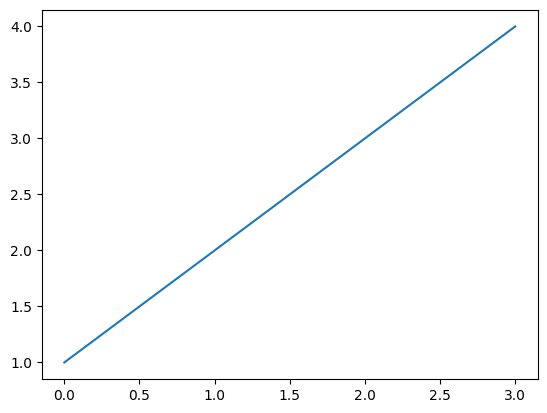

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.show()


plot data using Seaborn

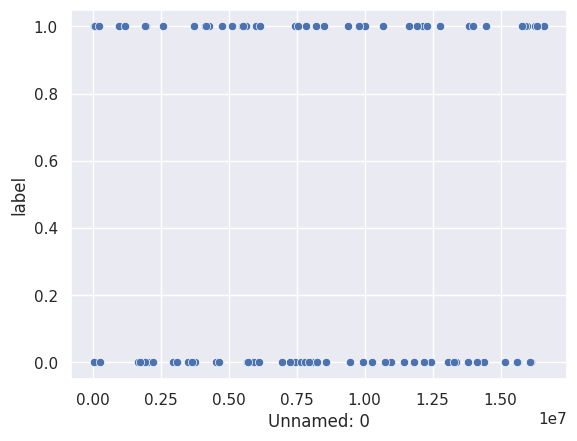

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
sns.scatterplot(x=synthetic_data['Unnamed: 0'], y=synthetic_data["label"])
plt.show()

Plotly

In [ ]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter(df[df["year"] == 2007], x="gdpPercap", y="lifeExp", color="continent")
fig.show()